# Vali Task - MBA bank dataset - 10 March 2021

In [6]:
#Project - MBA 
#Import all libraries

import os
import numpy as np
from numpy.random import random
from random import randrange, uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import curdoc, figure 
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, ColorBar, BoxSelectTool, LassoSelectTool
from bokeh.models import WMTSTileSource, CustomJS, RangeSlider, Select, TextInput, Button
from bokeh.models import Paragraph, CDSView, IndexFilter, BooleanFilter
from bokeh.layouts import gridplot, column, row
from bokeh.transform import factor_cmap, transform
from bokeh.models.widgets import Slider

import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import sklearn.metrics as sm

import warnings
warnings.filterwarnings("ignore")

#from bokeh.plotting import output_file

#output_file("GADplot.html")
output_notebook()

Loading BokehJS ...

In [8]:
#Read data from the orginal .xls file
xls = pd.ExcelFile(r"Bank_data_clean_file.xls") #use r before absolute file path 
df = xls.parse(0) #if the file has only 1 sheet write 0 in paranthesis
df

,Company Name,Country,GICS Sector,GICS Industry Group,GICS Industry,GICS Sub-Industry,ISIN code,Sedol code,Industry Group Average,Total Rating Score,...,H.1.h Factory farming,H.2.a Alcohol,H.2.b Firearms,H.2.c Military contracting,H.2.c.1 Nuclear weapons,H.2.d Pornography,H.2.e Tobacco,H.2.f Gambling,H.2.g Nuclear power,H.3.a Animal testing
0,3I Group plc,United Kingdom,Financials,Diversified Financials,Capital Markets,Asset Management & Custody Banks,GB0008886938,888693,na,na,...,100,100,100,100,100,100,100,100,100,100
1,3M Company,United States,Industrials,Capital Goods,Industrial Conglomerates,Industrial Conglomerates,US88579Y1010,2595708,na,na,...,100,100,100,100,100,100,100,100,100,0
2,ABB,Switzerland,Industrials,Capital Goods,Electrical Equipment,Heavy Electrical Equipment,CH0012221716,7108899,na,na,...,100,100,100,50,100,100,100,100,100,100
3,Abbey National,United Kingdom,Financials,Banks,Commercial Banks,Diversified Banks,GB0000044551,4455,na,na,...,100,100,100,100,100,100,100,100,100,100
4,Abbott Laboratories,United States,Health Care,Pharmaceuticals & Biotechnology,Pharmaceuticals,Pharmaceuticals,US0028241000,2002305,na,na,...,100,100,100,100,100,100,100,100,100,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Wyeth,United States,Health Care,Pharmaceuticals & Biotechnology,Pharmaceuticals,Pharmaceuticals,US9830241009,2027104,na,na,...,100,100,100,100,100,100,100,100,100,50
586,YAHOO! Inc.,United States,Information Technology,Software & Services,Internet Software & Services,Internet Software & Services,US9843321061,2986539,na,na,...,100,100,100,100,100,50,100,50,100,100
587,Yamanouchi Pharmaceutical,Japan,Health Care,Pharmaceuticals & Biotechnology,Pharmaceuticals,Pharmaceuticals,JP3942400007,6985383,na,na,...,100,100,100,100,100,100,100,100,100,50
588,Zimmer Holdings,United States,Health Care,Health Care Equipment & Services,Health Care Equipment & Supplies,Health Care Equipment,US98956P1021,2783815,na,na,...,100,100,100,100,100,100,100,100,100,100


In [109]:
#Show all column names
#list(df.columns) 

In [10]:
#drop useless columns
df = df.drop([ 'ISIN code',
                 'Sedol code',
                 'Industry Group Average',
                 'Total Rating Score',
                 'Business Ethics',
                 'Community',
                 'Corporate Governance',
                 'Customer',
                 'Employees',
                 'Environment',
                 'Contractors',
                 'Controversial Activities',
                 'Excluded (Yes/No)',
                 'TRANSP-COM',
                 'TRANSP-CUST',
                 'TRANSP-EMP',
                 'TRANSP-ENV',
                 'TRANSP-S&C'],axis = 1)

In [23]:
ourDataSet1 = df
ourDataSet1_label = ourDataSet1['Company Name']
ourDataSet1_feature = ourDataSet1.drop([ 'Company Name',
                                             'Country',
                                             'GICS Sector',
                                             'GICS Industry Group',
                                             'GICS Industry',
                                             'GICS Sub-Industry'],axis = 1)

In [26]:
#Scaling features of the data
scaler = preprocessing.StandardScaler().fit(ourDataSet1_feature)
ourDataSet1_feature_scaled = scaler.transform(ourDataSet1_feature)
ourDataSet1_feature_scaled.shape

(590, 199)

In [27]:
#Scaled dataframe
ourDataSet1_feature_scaled_df = pd.DataFrame.from_records(ourDataSet1_feature_scaled)
colnames = list(ourDataSet1_feature.columns)
ourDataSet1_feature_scaled_df.columns = colnames
ourDataSet1_feature_scaled_df.describe()

,A.1.a Separate report addressing business ethics issues,A.1.b Information on business ethics issues on website,A.1.c Information on business ethics in annual report,A.1.d Formal policy statement on business ethics,A.1.e Description of business ethics programs and organisation,A.2.a Formal policy statement on bribery and corruption,A.3.a Designated responsibility for business ethics issues,A.3.b Business ethics programs addressing bribery and corruption,A.4.a Bribery and corruption,A.4.b Political donations,...,H.1.h Factory farming,H.2.a Alcohol,H.2.b Firearms,H.2.c Military contracting,H.2.c.1 Nuclear weapons,H.2.d Pornography,H.2.e Tobacco,H.2.f Gambling,H.2.g Nuclear power,H.3.a Animal testing
count,590.000000,5.900000e+02,5.900000e+02,5.900000e+02,590.000000,5.900000e+02,590.0,5.900000e+02,5.900000e+02,5.900000e+02,...,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02,5.900000e+02
mean,0.000000,-4.215084e-17,3.161313e-17,-7.376397e-17,0.000000,-3.161313e-17,0.0,1.505387e-17,-1.144094e-16,-3.462390e-17,...,2.107542e-16,-2.905397e-16,1.544527e-15,-5.118316e-17,3.251636e-16,-2.167757e-16,-2.830128e-16,-6.473165e-17,1.987111e-16,1.716141e-16
std,1.000849,1.000849e+00,1.000849e+00,1.000849e+00,1.000849,1.000849e+00,0.0,1.000849e+00,1.000849e+00,1.000849e+00,...,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00,1.000849e+00
min,-0.103473,-9.749720e-02,-7.148939e-02,-1.009694e+00,-0.067382,-1.249383e+00,0.0,-8.009504e-01,-6.532247e+00,-5.832118e-02,...,-6.377885e+00,-5.045737e+00,-1.398809e+01,-4.125203e+00,-8.034647e+00,-7.079247e+00,-6.493323e+00,-8.161984e+00,-5.566435e+00,-4.121089e+00
25%,-0.103473,-9.749720e-02,-7.148939e-02,-1.009694e+00,-0.067382,-1.249383e+00,0.0,-8.009504e-01,2.697751e-01,-5.832118e-02,...,2.412041e-01,2.989395e-01,7.148939e-02,3.777938e-01,1.244610e-01,2.806750e-01,2.337368e-01,1.766663e-01,2.360326e-01,3.691096e-01
50%,-0.103473,-9.749720e-02,-7.148939e-02,8.629866e-03,-0.067382,6.298673e-01,0.0,-8.009504e-01,2.697751e-01,-5.832118e-02,...,2.412041e-01,2.989395e-01,7.148939e-02,3.777938e-01,1.244610e-01,2.806750e-01,2.337368e-01,1.766663e-01,2.360326e-01,3.691096e-01
75%,-0.103473,-9.749720e-02,-7.148939e-02,1.026954e+00,-0.067382,1.099680e+00,0.0,1.083639e+00,2.697751e-01,-5.832118e-02,...,2.412041e-01,2.989395e-01,7.148939e-02,3.777938e-01,1.244610e-01,2.806750e-01,2.337368e-01,1.766663e-01,2.360326e-01,3.691096e-01
max,12.106328,1.140717e+01,1.398809e+01,1.026954e+00,19.810223,1.099680e+00,0.0,1.554786e+00,2.697751e-01,1.714643e+01,...,2.412041e-01,2.989395e-01,7.148939e-02,3.777938e-01,1.244610e-01,2.806750e-01,2.337368e-01,1.766663e-01,2.360326e-01,3.691096e-01


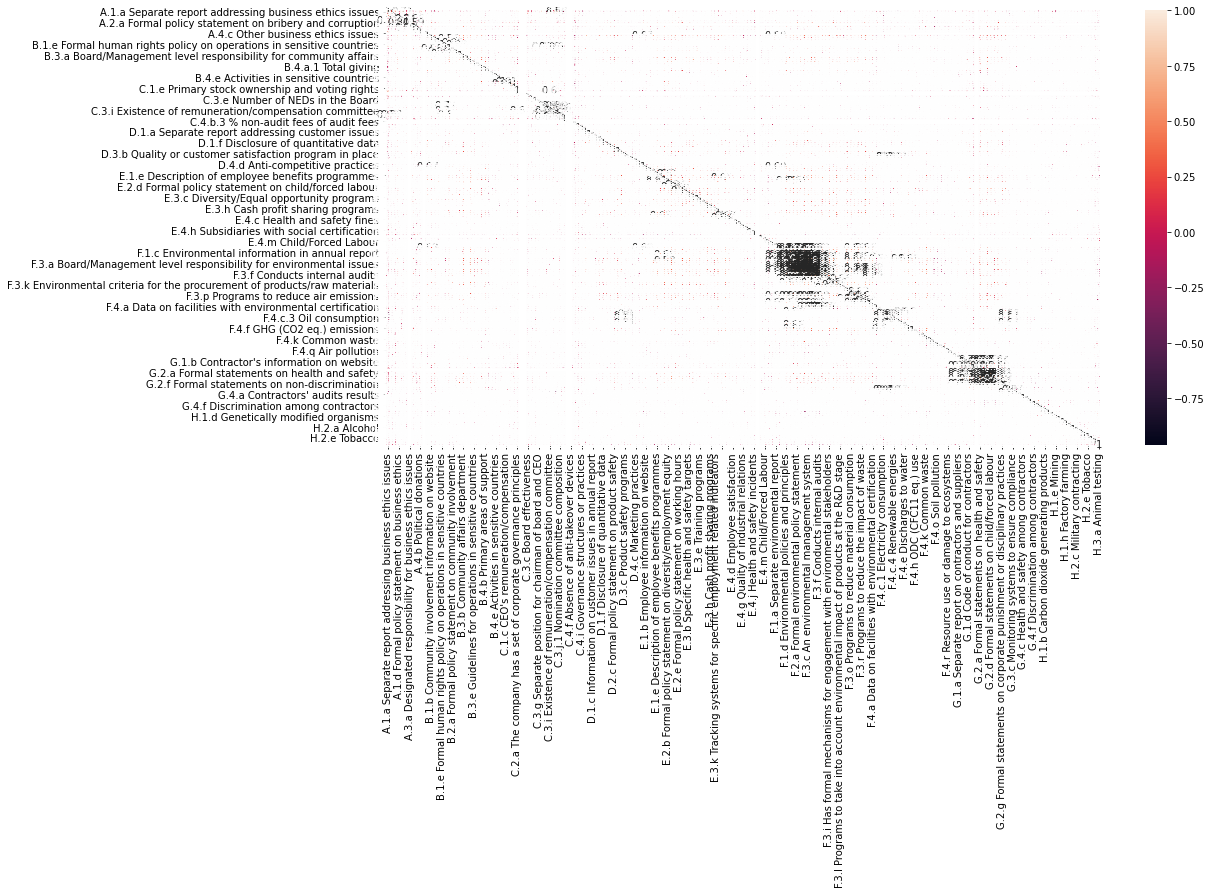

In [28]:
%%time
#Check the correltion of scaled data
plt.figure(figsize=(16, 8))
corrMatrix = ourDataSet1_feature_scaled_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

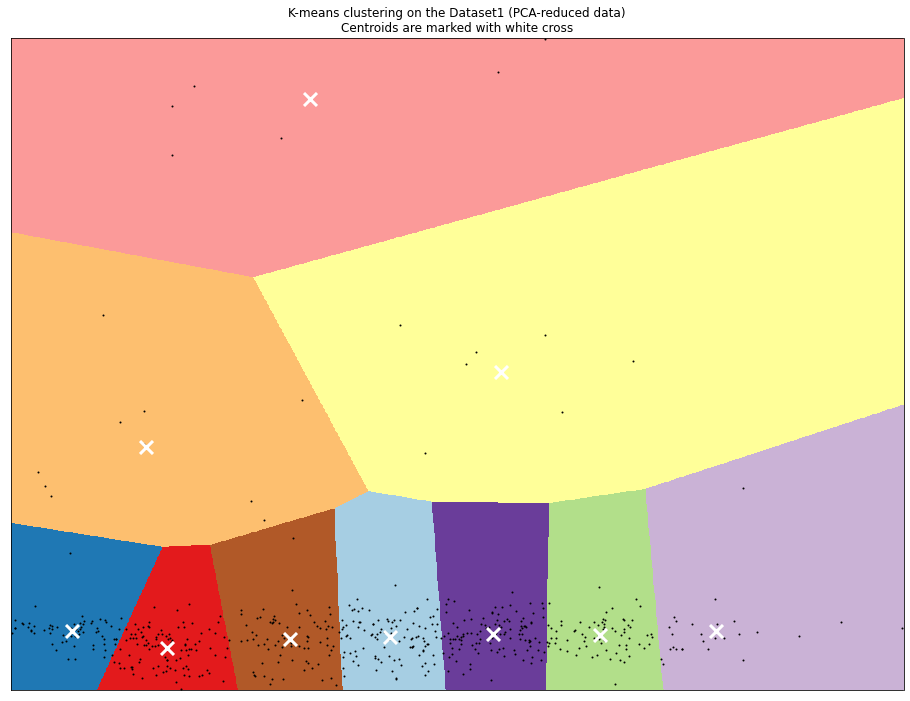

In [29]:
#Clustering method based on PCA reduced data
reduced_data = PCA(n_components=2).fit_transform(ourDataSet1_feature_scaled)
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(reduced_data)

dataframePCA = pd.DataFrame.from_records(reduced_data)
dataframePCA['label']=kmeans.labels_

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 0.05, reduced_data[:, 0].max() + 0.05
y_min, y_max = reduced_data[:, 1].min() - 0.05, reduced_data[:, 1].max() + 0.05

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16, 12))
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(dataframePCA[0], dataframePCA[1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the Dataset1 (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
#plt.legend()
plt.show()

In [30]:
#Show summary of 2-D PCA space
dataframePCA.columns = ['PCA1', 'PCA2','Clusters']
dataframePCA['Company_name']=ourDataSet1_label

dataframePCA

,PCA1,PCA2,Clusters,Company_name
0,-2.135415,-0.952241,9,3I Group plc
1,8.419404,-1.474634,6,3M Company
2,12.260438,-0.448881,6,ABB
3,4.750446,-0.738571,7,Abbey National
4,2.093514,-1.722254,0,Abbott Laboratories
...,...,...,...,...
585,2.363417,-1.225243,7,Wyeth
586,-8.087061,-1.490194,1,YAHOO! Inc.
587,1.054544,-0.022669,0,Yamanouchi Pharmaceutical
588,-3.267349,-0.663915,9,Zimmer Holdings


In [31]:
#Add color index to plot
dataframePCA['color']=kmeans.labels_
for i in range(len(dataframePCA['color'])):
    if dataframePCA['color'][i]==0:
        dataframePCA['color'].loc[i] = 'black'
    if dataframePCA['color'][i]==1:
        dataframePCA['color'].loc[i] = 'brown'    
    if dataframePCA['color'][i]==2:
        dataframePCA['color'].loc[i] = 'tomato'
    if dataframePCA['color'][i]==3:
        dataframePCA['color'].loc[i] = 'darkorange'
    if dataframePCA['color'][i]==4:
        dataframePCA['color'].loc[i] = 'gold'
    if dataframePCA['color'][i]==5:
        dataframePCA['color'].loc[i] = 'green'
    if dataframePCA['color'][i]==6:
        dataframePCA['color'].loc[i] = 'skyblue'
    if dataframePCA['color'][i]==7:
        dataframePCA['color'].loc[i] = 'blue'
    if dataframePCA['color'][i]==8:
        dataframePCA['color'].loc[i] = 'violet'
    if dataframePCA['color'][i]==9:
        dataframePCA['color'].loc[i] = 'pink'

dataframePCA 

,PCA1,PCA2,Clusters,Company_name,color
0,-2.135415,-0.952241,9,3I Group plc,pink
1,8.419404,-1.474634,6,3M Company,skyblue
2,12.260438,-0.448881,6,ABB,skyblue
3,4.750446,-0.738571,7,Abbey National,blue
4,2.093514,-1.722254,0,Abbott Laboratories,black
...,...,...,...,...,...
585,2.363417,-1.225243,7,Wyeth,blue
586,-8.087061,-1.490194,1,YAHOO! Inc.,brown
587,1.054544,-0.022669,0,Yamanouchi Pharmaceutical,black
588,-3.267349,-0.663915,9,Zimmer Holdings,pink


In [120]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show

#output_file("label.html", title="label.py example")
output_notebook()

source = ColumnDataSource(data=dict(dataframePCA))

p = figure(plot_width=1000, plot_height=600, title='2-D PCA space of MDS',
                   tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset")
p.scatter(x='PCA1', y='PCA2', size=0.5, alpha=0.5, source=source)
p.xaxis[0].axis_label = 'PC1'
p.yaxis[0].axis_label = 'PC2'

labels = LabelSet(x='PCA1', y='PCA2', text='Company_name', level='glyph', text_color='color', source=source, render_mode='canvas', text_alpha=0.7, text_font_size="5pt")

p.add_layout(labels)

show(p)

Loading BokehJS ...

In [104]:
select_all = ['ALL', 'Select_Conditions']

df_Company_Name= df['Company Name'].unique().tolist()
df_Company_Name.append('ALL')
df_Company_Name.sort()

df_Country= df['Country'].unique().tolist()
df_Country.append('ALL')
df_Country.sort()

df_GICS_Sector= df['GICS Sector'].unique().tolist()
df_GICS_Sector.append('ALL')
df_GICS_Sector.sort()

df_GICS_Industry_Group= df['GICS Industry Group'].unique().tolist()
#df_GICS_Industry_Group.append('ALL')
df_GICS_Industry_Group.sort()

df_GICS_Industry= df['GICS Industry'].unique().tolist()
#df_GICS_Industry.append('ALL')
df_GICS_Industry.sort()

df_GICS_Sub_Industry= df['GICS Sub-Industry'].unique().tolist()
#df_GICS_Sub_Industry.append('ALL')
df_GICS_Sub_Industry.sort()

#df_GICS_Sub_Industry

In [117]:
def modify_doc(doc):
    
    options = dict(plot_width=1600, plot_height=1200,
                   tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset")
    
    #source = ColumnDataSource(data=dict(dataframePCA))
    source = ColumnDataSource(dataframePCA)

    p = figure(plot_width=1000, plot_height=600, title='2-D PCA space of MDS',
                       tools="pan,wheel_zoom,box_zoom,box_select,lasso_select,reset")
    p.scatter(x='PCA1', y='PCA2', size=0.5, alpha=0.5, source=source)
    p.xaxis[0].axis_label = 'PC1'
    p.yaxis[0].axis_label = 'PC2'
    labels = LabelSet(x='PCA1', y='PCA2', text='Company_name', level='glyph', text_color='color', source=source, render_mode='canvas', text_alpha=0.7, text_font_size="5pt")
    p.add_layout(labels)
    
    # selections    
    #select0 = Select(title="Select_all:", value="ALL", options=select_all)
    select1 = Select(title="Select_Company_Name:", value="ALL", options=df_Company_Name)
    select2 = Select(title="Select_Country:", value="ALL", options=df_Country)
    select3 = Select(title="Select_GICS_Sector:", value="ALL", options=df_GICS_Sector)
    #select4 = Select(title="Select_GICS_Industry_Group:", value="Automobiles & Components", options=df_GICS_Industry_Group)
    #select5 = Select(title="Select_GICS_Industry:", value="Aerospace & Defense", options=df_GICS_Industry)
    #select6 = Select(title="Select_GICS_Sub_Industry:", value="Advertising", options=df_GICS_Sub_Industry)
    

    def update_all(attrname, old, new):
        
        if select1.value == 'ALL' and select2.value == 'ALL' and select3.value == 'ALL' :
            df_udpated = df
        elif select1.value != 'ALL' and select2.value == 'ALL' and select3.value == 'ALL' :
            df_udpated = df[
                             (df['Company Name']==select1.value)
                             #(df['Country']==select2.value)&
                             #(df['GICS Sector']==select3.value)
                             ] 
        elif select1.value == 'ALL' and select2.value != 'ALL' and select3.value == 'ALL' :
            df_udpated = df[
                             #(df['Company Name']==select1.value)&
                             (df['Country']==select2.value)
                             #(df['GICS Sector']==select3.value)
                             ]
        elif select1.value == 'ALL' and select2.value == 'ALL' and select3.value != 'ALL' :
            df_udpated = df[
                             #(df['Company Name']==select1.value)&
                             #(df['Country']==select2.value)&
                             (df['GICS Sector']==select3.value)
                             ]    
        elif select1.value != 'ALL' and select2.value != 'ALL' and select3.value == 'ALL' :
            df_udpated = df[
                             (df['Company Name']==select1.value)&
                             (df['Country']==select2.value)
                             #(df['GICS Sector']==select3.value)
                             ]            
        elif select1.value != 'ALL' and select2.value != 'ALL' and select3.value != 'ALL' :
            df_udpated = df[
                             (df['Company Name']==select1.value)&
                             (df['Country']==select2.value)&
                             (df['GICS Sector']==select3.value)
                             ]            
        elif select1.value == 'ALL' and select2.value != 'ALL' and select3.value != 'ALL' :
            df_udpated = df[
                             #(df['Company Name']==select1.value)&
                             (df['Country']==select2.value)&
                             (df['GICS Sector']==select3.value)
                             ]             
        elif select1.value != 'ALL' and select2.value == 'ALL' and select3.value != 'ALL' :
            df_udpated = df[
                             (df['Company Name']==select1.value)&
                             #(df['Country']==select2.value)&
                             (df['GICS Sector']==select3.value)
                             ]            
        
        #print(df_udpated)
        source.data = dataframePCA.iloc[df_udpated.index.tolist()]
        #print(source.data)
                        
    #select0.on_change('value', update_all)
    select1.on_change('value', update_all)
    select2.on_change('value', update_all)
    select3.on_change('value', update_all)
    #select4.on_change('value', update_all)
    #select5.on_change('value', update_all)
    #select6.on_change('value', update_all)    
       
    layout = column(#row(select0),
                    row(select1, select2, select3, width=1600), 
                    #row(select3, select4, select5, select6, width=1600),
                    row(p))


    doc.add_root(layout)
        
show(modify_doc)


In [121]:
## The above interative plot looks like this example (can be shown in the Juypter Notebook in real-time):
#from IPython.display import Image
#Image("InteractiveExample.png")

In [5]:
#%load_ext watermark
%reload_ext watermark

#python, ipython, packages and machine characteristics
%watermark -v -m -p pandas,numpy,geopy,matplotlib,seaborn,bokeh,sklearn,watermark

#date
print(' ')
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.9.1
IPython version      : 7.19.0

pandas    : 1.2.0
numpy     : 1.19.4
geopy     : 2.1.0
matplotlib: 3.3.3
seaborn   : 0.11.1
bokeh     : 2.2.3
sklearn   : 0.24.0
watermark : 2.2.0

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 20.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

 
Last updated: Thu Mar 11 2021 10:52:09GMT



In [ ]:
import os
import numpy as np
from numpy.random import random
from random import randrange, uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import curdoc, figure 
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, ColorBar, BoxSelectTool, LassoSelectTool
from bokeh.models import WMTSTileSource, CustomJS, RangeSlider, Select, TextInput, Button
from bokeh.models import Paragraph, CDSView, IndexFilter, BooleanFilter
from bokeh.layouts import gridplot, column, row
from bokeh.transform import factor_cmap, transform
from bokeh.models.widgets import Slider

import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

import sklearn.metrics as sm

import warnings
warnings.filterwarnings("ignore")

#from bokeh.plotting import output_file

#output_file("GADplot.html")
output_notebook()